<a href="https://colab.research.google.com/github/rnirms/MITOS_WSI_CMC/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import tensorflow as tf
from keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load the dataset and split into train/test

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f'Train size {x_train.shape}, test size {x_test.shape}')

Train size (60000, 28, 28), test size (10000, 28, 28)


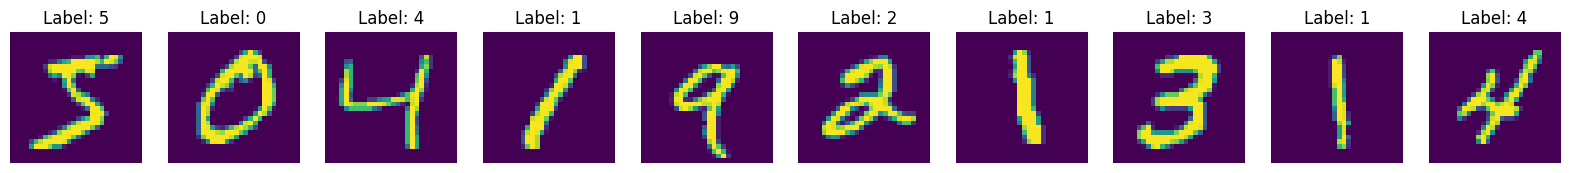

In [4]:
plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])  # Show the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Display the label as title
    plt.axis('off')  # Turn off axis labels

plt.show()

In [5]:
print(f"min val: {np.min(x_train[0])}, max val: {np.max(x_train[0])}, mean val: {np.mean(x_train[0])}")

min val: 0, max val: 255, mean val: 35.108418367346935


Modelling

In [6]:
# Documenting learning parameters
epochs = 10  # Number of times to iterate over the entire dataset
batch_size = 32  # Number of samples per gradient update
learning_rate = 0.001  # Step size for updating model weights

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

Training Parameters:
Epochs: 10
Batch Size: 32
Learning Rate: 0.001



In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8222 - loss: 7.1209 - val_accuracy: 0.8898 - val_loss: 0.4840
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9054 - loss: 0.3923 - val_accuracy: 0.9149 - val_loss: 0.3512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9308 - loss: 0.2766 - val_accuracy: 0.9348 - val_loss: 0.2867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9349 - loss: 0.2576 - val_accuracy: 0.9447 - val_loss: 0.2397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9458 - loss: 0.2152 - val_accuracy: 0.9418 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9491 - loss: 0.1992 - val_accuracy: 0.9315 - val_loss: 0.2952
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9502 - loss: 0.1897 - val_accuracy: 0.9483 - val_loss: 0.2725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9527 - loss: 0.18

Evaluate

Best Validation Loss: 0.2271
Best Validation Accuracy: 0.9516


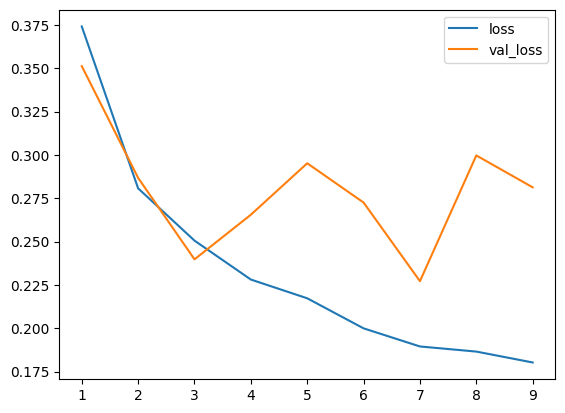

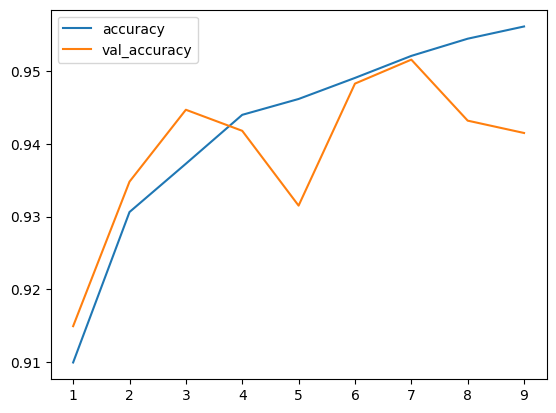

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))

Training Parameters:
Epochs: 10
Batch Size: 32
Learning Rate: 0.0001

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8255 - loss: 6.6896 - val_accuracy: 0.9028 - val_loss: 0.4704
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9150 - loss: 0.3679 - val_accuracy: 0.9266 - val_loss: 0.3415
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9337 - loss: 0.2631 - val_accuracy: 0.9344 - val_loss: 0.2822
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9400 - loss: 0.2361 - val_accuracy: 0.9354 - val_loss: 0.2803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9436 - loss: 0.2244 - val_accuracy: 0.9380 - val_loss: 0.2696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9497 - loss: 0.2042 - val_accuracy: 0.9428 - val_loss: 0.2600
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9501 - loss: 0.1979 - val_accuracy: 0.9355 - val_loss: 0.3181
Epoch 8/10
1875/18

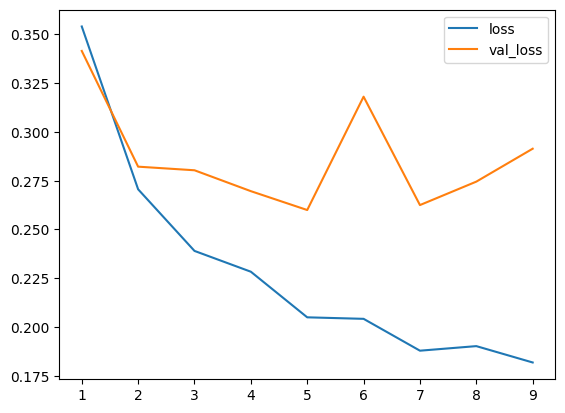

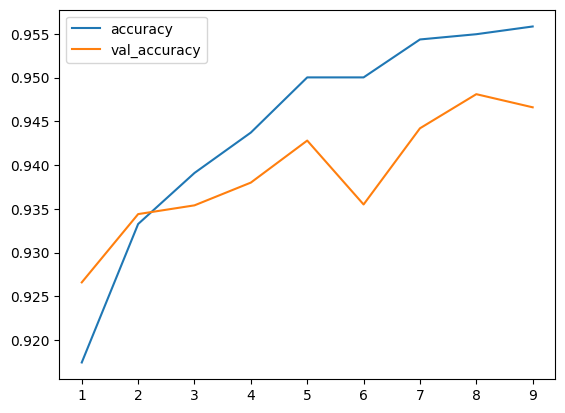

In [11]:
# Documenting learning parameters
epochs = 10  # Number of times to iterate over the entire dataset
batch_size = 32  # Number of samples per gradient update
learning_rate = 0.0001  # DECREASE LEARNING RATE

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 10
Batch Size: 64
Learning Rate: 0.001

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8199 - loss: 10.9358 - val_accuracy: 0.8944 - val_loss: 0.9544
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9140 - loss: 0.6573 - val_accuracy: 0.9129 - val_loss: 0.5069
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9328 - loss: 0.3207 - val_accuracy: 0.9231 - val_loss: 0.4116
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9454 - loss: 0.2403 - val_accuracy: 0.9415 - val_loss: 0.3036
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9499 - loss: 0.2011 - val_accuracy: 0.9425 - val_loss: 0.3447
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9518 - loss: 0.1928 - val_accuracy: 0.9434 - val_loss: 0.3106
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9555 - loss: 0.1821 - val_accuracy: 0.9512 - val_loss: 0.2533
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━

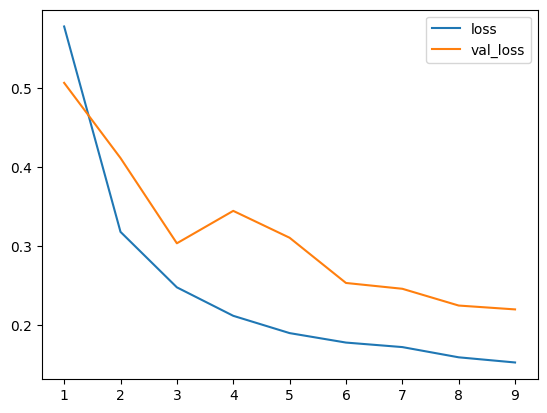

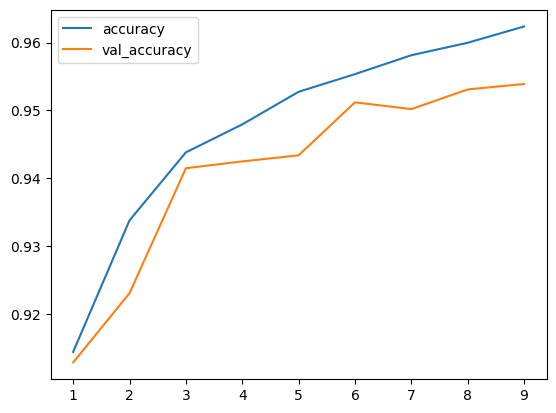

In [12]:
# Documenting learning parameters
epochs = 10  # Number of times to iterate over the entire dataset
batch_size = 64  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 128
Learning Rate: 0.001

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8068 - loss: 11.1704 - val_accuracy: 0.9153 - val_loss: 1.3611
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9238 - loss: 0.8869 - val_accuracy: 0.9132 - val_loss: 0.6511
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9326 - loss: 0.3811 - val_accuracy: 0.9323 - val_loss: 0.4603
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9514 - loss: 0.2307 - val_accuracy: 0.9332 - val_loss: 0.4018
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9575 - loss: 0.1791 - val_accuracy: 0.9424 - val_loss: 0.3517
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9603 - loss: 0.1590 - val_accuracy: 0.9430 - val_loss: 0.3406
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0.1369 - val_accuracy: 0.9474 - val_loss: 0.3316
Epoch 8/30
469/469 ━━━━━━━━━━━━━━

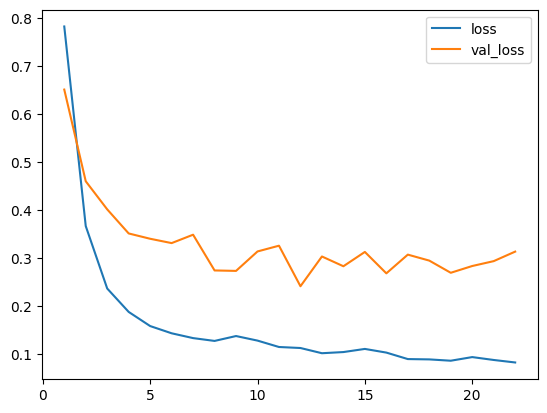

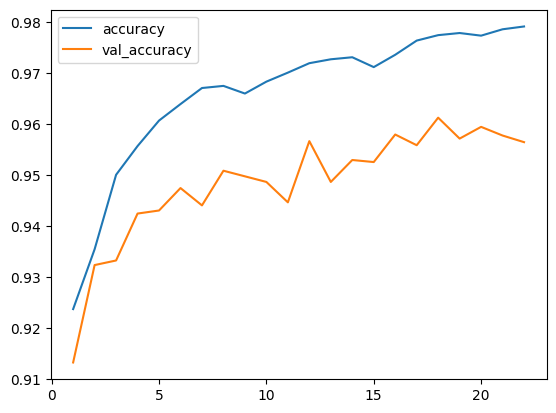

In [13]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 128  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 128
Learning Rate: 0.001

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8267 - loss: 0.5646 - val_accuracy: 0.9526 - val_loss: 0.1819
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9499 - loss: 0.1660 - val_accuracy: 0.9652 - val_loss: 0.1566
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9626 - loss: 0.1200 - val_accuracy: 0.9683 - val_loss: 0.1457
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9704 - loss: 0.0960 - val_accuracy: 0.9703 - val_loss: 0.1547
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9757 - loss: 0.0792 - val_accuracy: 0.9721 - val_loss: 0.1660
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9795 - loss: 0.0671 - val_accuracy: 0.9735 - val_loss: 0.1461
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9807 - loss: 0.0620 - val_accuracy: 0.9748 - val_loss: 0.1452
Epoch 8/30
469/469 ━━━━━━━━━━━━━━

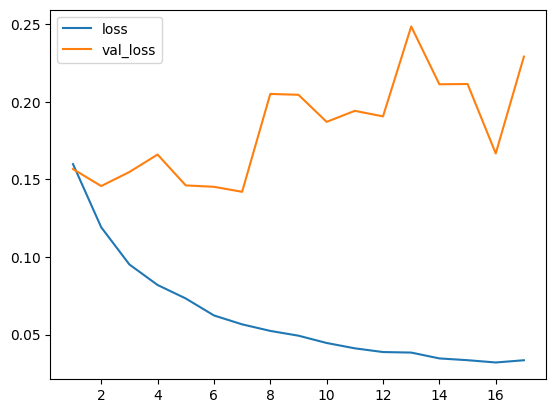

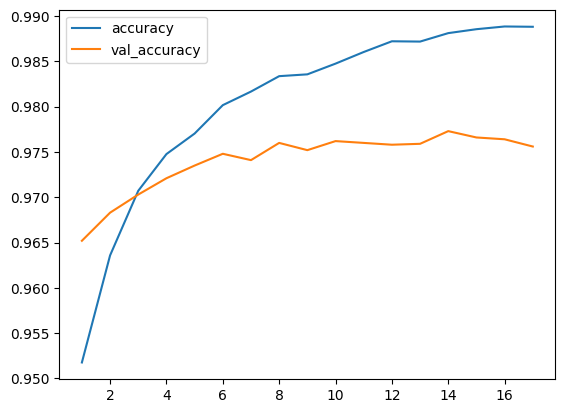

In [14]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 128  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Best Validation Loss: 0.1420
Best Validation Accuracy: 0.9773


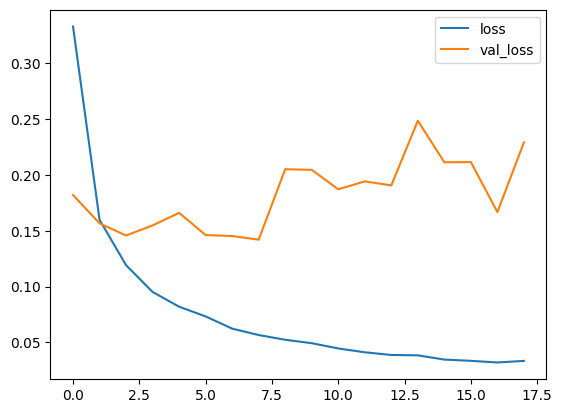

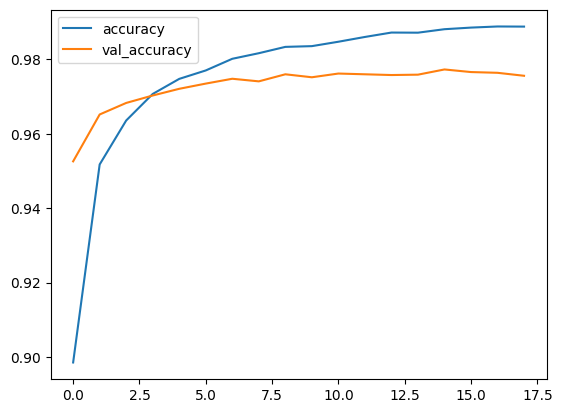

In [15]:
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 128
Learning Rate: 0.001

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4109 - loss: 1.7353 - val_accuracy: 0.8986 - val_loss: 0.4605
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7205 - loss: 0.8919 - val_accuracy: 0.9120 - val_loss: 0.3608
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7633 - loss: 0.7719 - val_accuracy: 0.9195 - val_loss: 0.3353
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7829 - loss: 0.7145 - val_accuracy: 0.9205 - val_loss: 0.3282
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7907 - loss: 0.6827 - val_accuracy: 0.9224 - val_loss: 0.3184
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7959 - loss: 0.6762 - val_accuracy: 0.9279 - val_loss: 0.3088
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8036 - loss: 0.6441 - val_accuracy: 0.9276 - val_loss: 0.3146
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━

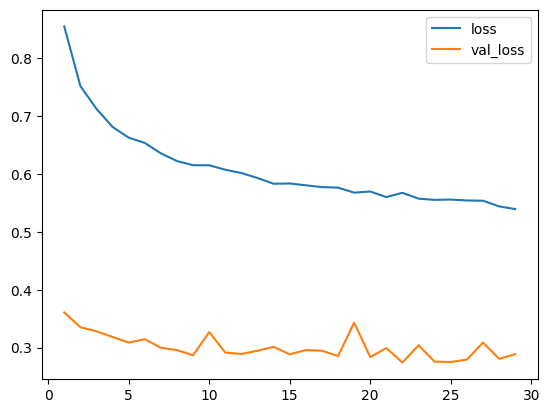

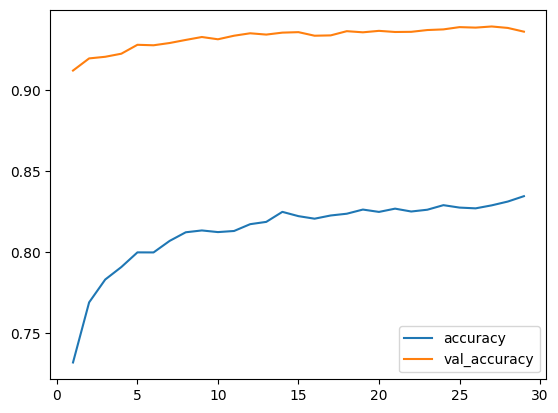

In [18]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 128  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 32
Learning Rate: 0.0001

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6049 - loss: 1.2089 - val_accuracy: 0.9164 - val_loss: 1.2903
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8253 - loss: 0.5883 - val_accuracy: 0.9279 - val_loss: 1.8785
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8474 - loss: 0.5231 - val_accuracy: 0.9364 - val_loss: 1.1896
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8616 - loss: 0.4773 - val_accuracy: 0.9404 - val_loss: 1.4216
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8623 - loss: 0.4664 - val_accuracy: 0.9418 - val_loss: 0.9628
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8722 - loss: 0.4399 - val_accuracy: 0.9420 - val_loss: 0.6976
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8746 - loss: 0.4277 - val_accuracy: 0.9467 - val_loss: 0.7999
Epoch 8/30
1875/18

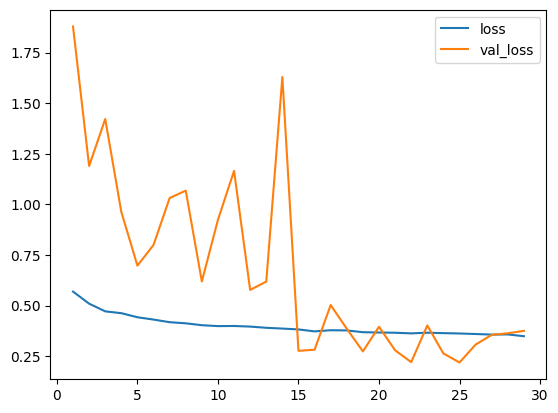

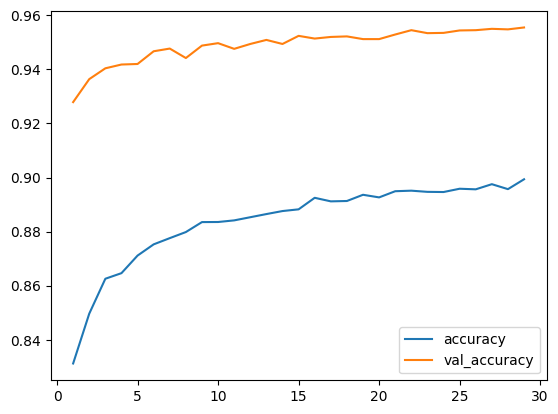

In [19]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 32  # Number of samples per gradient update
learning_rate = 0.0001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 64
Learning Rate: 0.001

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5881 - loss: 1.2756 - val_accuracy: 0.9185 - val_loss: 0.3408
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8449 - loss: 0.5259 - val_accuracy: 0.9349 - val_loss: 0.2654
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8687 - loss: 0.4516 - val_accuracy: 0.9413 - val_loss: 0.2526
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8825 - loss: 0.4106 - val_accuracy: 0.9441 - val_loss: 0.2421
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8915 - loss: 0.3858 - val_accuracy: 0.9492 - val_loss: 0.2990
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8940 - loss: 0.3678 - val_accuracy: 0.9513 - val_loss: 0.2861
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8995 - loss: 0.3548 - val_accuracy: 0.9521 - val_loss: 0.2703
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━

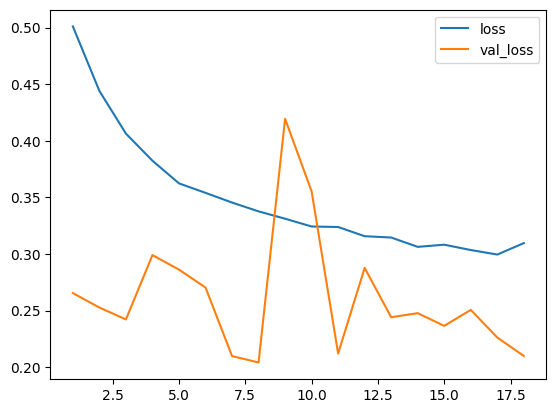

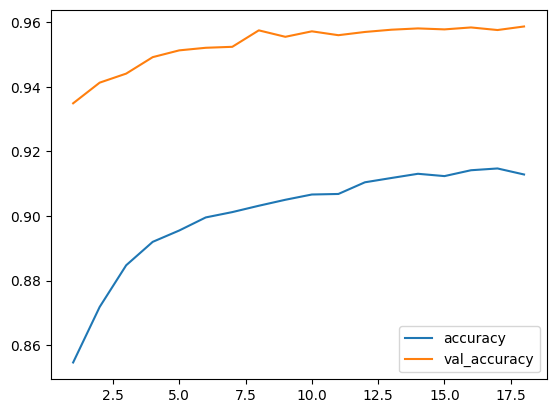

In [20]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 64  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 128
Learning Rate: 0.001

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6721 - loss: 1.0423 - val_accuracy: 0.9317 - val_loss: 0.2504
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8983 - loss: 0.3517 - val_accuracy: 0.9513 - val_loss: 0.2223
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9185 - loss: 0.2753 - val_accuracy: 0.9579 - val_loss: 0.2818
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9291 - loss: 0.2416 - val_accuracy: 0.9588 - val_loss: 0.6689
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9387 - loss: 0.2095 - val_accuracy: 0.9645 - val_loss: 0.4389
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9421 - loss: 0.1983 - val_accuracy: 0.9660 - val_loss: 0.2014
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9457 - loss: 0.1844 - val_accuracy: 0.9684 - val_loss: 0.1857
Epoch 8/30
469/469 ━━━━━━━━━━━━

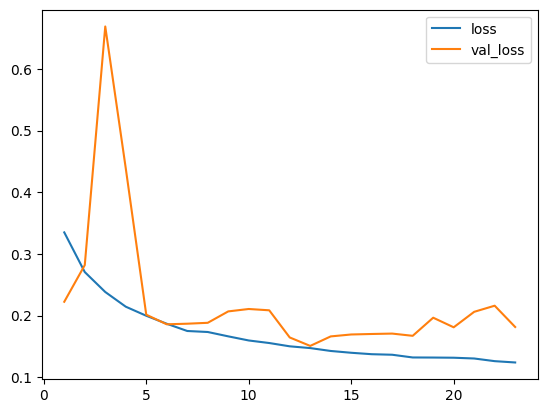

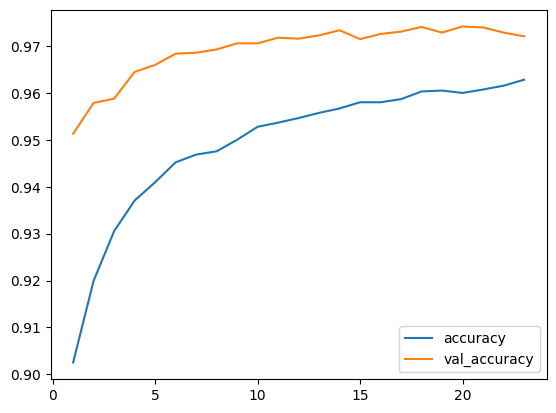

In [21]:
# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 128  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))


Training Parameters:
Epochs: 30
Batch Size: 128
Learning Rate: 0.001



/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - binary_accuracy: 0.7465 - loss: 0.5407 - val_binary_accuracy: 0.9804 - val_loss: 0.1290
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - binary_accuracy: 0.9808 - loss: 0.0892 - val_binary_accuracy: 0.9883 - val_loss: 0.0459
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - binary_accuracy: 0.9886 - loss: 0.0421 - val_binary_accuracy: 0.9924 - val_loss: 0.0270
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - binary_accuracy: 0.9912 - loss: 0.0304 - val_binary_accuracy: 0.9930 - val_loss: 0.0220
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - binary_accuracy: 0.9927 - loss: 0.0237 - val_binary_accuracy: 0.9943 - val_loss: 0.0176
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - binary_accuracy: 0.9936 - loss: 0.0205 - val_binary_accuracy: 0.9950 - val_loss: 0.0160
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - binary_accuracy: 0.9945 - loss: 0.0174 - val_binary_accuracy: 0.9947 - val_loss: 0.0159

KeyError: "None of [Index(['accuracy', 'val_accuracy'], dtype='object')] are in the [columns]"

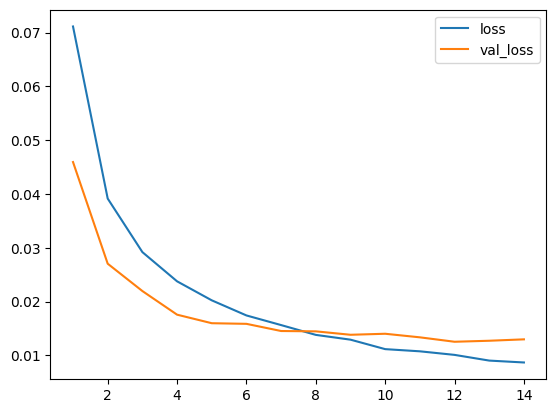

In [22]:
# Normalize pixel values to be in the range [0, 1] by dividing by 255.0
x_train1, x_test1 = x_train / 255.0, x_test / 255.0

# Reshape the input data to add a channel dimension (from (28,28) to (28,28,1)),
x_train1 = x_train1.reshape(-1, 28, 28, 1)
x_test1 = x_test1.reshape(-1, 28, 28, 1)

# Convert class labels into one-hot encoded vectors.
# This is necessary for multi-class classification because the model outputs probabilities
# for each of the 10 classes instead of a single label.
y_train1 = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test1 = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Documenting learning parameters
epochs = 30  # Number of times to iterate over the entire dataset
batch_size = 128  # Number of samples per gradient update
learning_rate = 0.001

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model1 = tf.keras.Sequential([
        layers.BatchNormalization(input_shape=(28, 28, 1)), # Batch Normalization to normalize inputs and stabilize training
        layers.Flatten(), # Flatten the 28x28 image into a 1D vector (784 values) for the fully connected layers
        layers.Dense(256, activation='relu'), # First dense layer with 256 neurons and ReLU activation
        layers.BatchNormalization(),
        layers.Dropout(0.3), # Dropout layer to prevent overfitting
        layers.Dense(256, activation='relu'), # Second dense layer with 256 neurons and ReLU activation
        layers.BatchNormalization(),
        layers.Dropout(0.3), # Another Dropout layer (30%) to reduce overfitting
        layers.Dense(10, activation='sigmoid') # Output layer with 10 neurons (one for each class) and sigmoid activation
    ])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

# Define an EarlyStopping callback to prevent overfitting

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,  # Stop training if validation loss does not improve for 5 consecutive epochs
    min_delta=0.001,  # Minimum change in validation loss to be considered an improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model
# Train the model using the training dataset and validate on the validation dataset

history = model1.fit(
    x_train1, y_train1,
    validation_data=(x_test1, y_test1),
    batch_size=512,  # Number of samples processed before updating model weights
    epochs=15,  # Maximum number of training epochs
    callbacks=[early_stopping],  # Apply EarlyStopping to stop training if validation loss stops improving
)




Best Validation Loss: 0.0125
Best Validation Accuracy: 0.9960


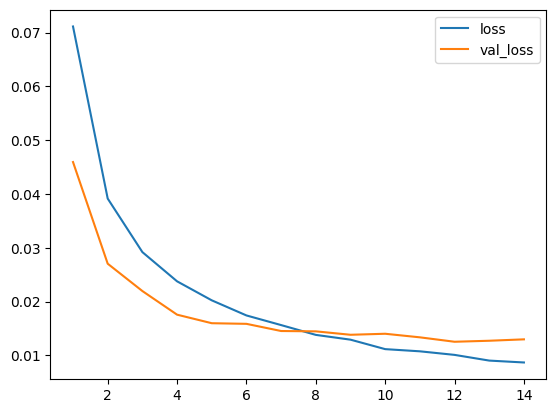

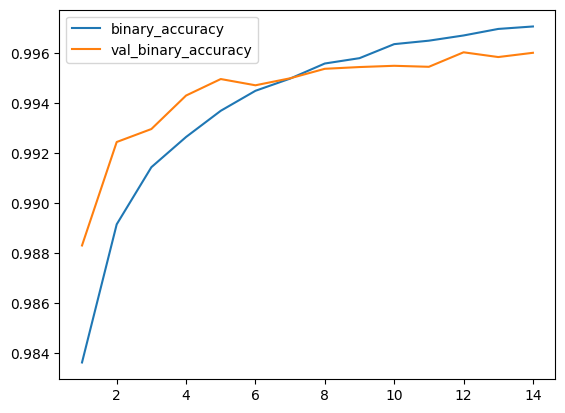

In [23]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:,['loss', 'val_loss']].plot()
history_df.loc[1:,['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))


In [29]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
predictions[100]

array([3.5758101e-05, 2.6769437e-06, 2.2074260e-05, 1.6091782e-08,
       2.0247768e-05, 3.4212651e-06, 9.9991280e-01, 1.8289560e-07,
       2.7235944e-06, 3.3560166e-08], dtype=float32)

In [31]:
predictions1 = model1.predict(x_test1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
predictions1[100]

array([6.4109197e-05, 1.2843052e-04, 2.0179188e-05, 1.3271101e-04,
       2.4232989e-04, 6.8864058e-05, 9.9999809e-01, 8.5705578e-05,
       1.1109554e-04, 6.0852723e-05], dtype=float32)

In [38]:
for i in range(len(predictions)):
   if np.max(predictions[i]) < 0.7:
    print (f"{i}, {y_test[i]}, {np.argmax(predictions[i])}, {np.max(predictions[i])}")

8, 5, 5, 0.5406742095947266
18, 3, 8, 0.4142531156539917
115, 4, 4, 0.6717694401741028
233, 8, 8, 0.4846436679363251
266, 8, 8, 0.5778404474258423
290, 8, 8, 0.46058475971221924
320, 9, 9, 0.5002914667129517
340, 5, 3, 0.5271705389022827
359, 9, 9, 0.6828504204750061
435, 8, 7, 0.39452216029167175
448, 9, 8, 0.48540011048316956
495, 8, 0, 0.5716859102249146
531, 3, 3, 0.5991973280906677
543, 8, 8, 0.41774553060531616
578, 3, 3, 0.6791657209396362
591, 8, 8, 0.5909264087677002
619, 1, 1, 0.6464309692382812
659, 2, 2, 0.522221028804779
674, 5, 5, 0.5246963500976562
707, 4, 4, 0.6570824980735779
720, 5, 5, 0.5733298063278198
740, 4, 9, 0.5795896649360657
760, 4, 9, 0.5712539553642273
810, 7, 2, 0.6129820942878723
877, 8, 6, 0.67543625831604
883, 3, 5, 0.6878753900527954
900, 1, 3, 0.6155154705047607
924, 2, 2, 0.6406086087226868
947, 8, 8, 0.6663869023323059
951, 5, 4, 0.6717511415481567
1039, 7, 7, 0.6412597298622131
1044, 6, 6, 0.5642889142036438
1082, 5, 3, 0.6101797223091125
1107, 9, 

In [42]:
len(predictions)

False

In [39]:
for i in range(len(predictions1)):
   if np.max(predictions1[i]) < 0.7:
    print (f"{i}, {y_test1[i]}, {np.argmax(predictions1[i])}, {np.max(predictions1[i])}")

115, [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], 9, 0.6295932531356812
151, [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], 9, 0.2985277473926544
241, [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], 8, 0.537154495716095
274, [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], 9, 0.43008095026016235
290, [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], 8, 0.28921830654144287
340, [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], 3, 0.5969734191894531
435, [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], 8, 0.373419851064682
447, [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], 9, 0.5161869525909424
495, [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], 2, 0.4552096426486969
543, [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], 3, 0.49047204852104187
583, [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], 8, 0.3217221200466156
610, [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], 4, 0.38852137327194214
619, [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], 8, 0.39630475640296936
659, [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], 7, 0.254809707403183
684, [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], 3, 0.3882848024368286
877, [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], 8, 0.660679817199707
882, [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], 9

In [47]:
np.max(np.sum(predictions1, axis=1))

1.9748257

In [ ]:
# Make predictions
predictions = model.predict(x_test)

wrong_predictions = np.where(np.argmax(predictions, axis=1) != y_test)[0]
print(f"Number of wrong predictions: {len(wrong_predictions)} out of {len(predictions)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of wrong predictions: 614 out of 10000


In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
predictions[0]

array([2.4798212e-25, 1.8475199e-18, 1.2337001e-08, 1.2970820e-10,
       4.6904979e-17, 3.4814288e-10, 0.0000000e+00, 9.9999994e-01,
       7.2114367e-18, 6.0001143e-11], dtype=float32)

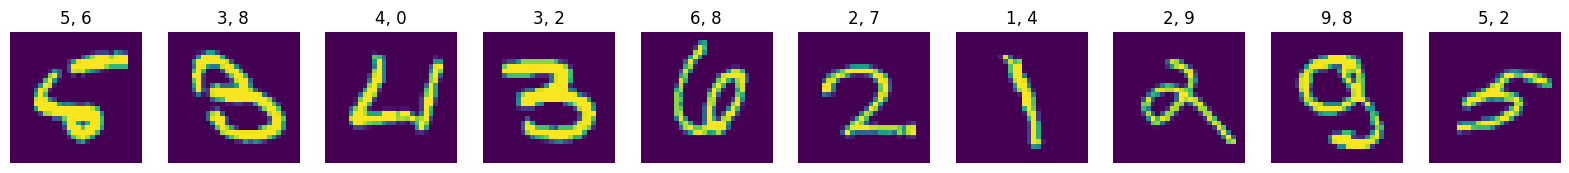

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(10):
    k = wrong_predictions[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[k])  # Show the image in grayscale
    plt.title(f"{y_test[k]}, {predictions[k].argmax()}")  # Display the label as title
    plt.axis('off')  # Turn off axis labels

plt.show()

In [ ]:
# Documenting learning parameters
epochs = 20  # Number of times to iterate over the entire dataset
batch_size = 32  # Number of samples per gradient update
learning_rate = 0.001  # Step size for updating model weights

# Print out the parameters for clarity
print(f"Training Parameters:\nEpochs: {epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}\n")

model = models.Sequential([
    Input(shape=(28, 28)),
    layers.Flatten(),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

Training Parameters:
Epochs: 20
Batch Size: 32
Learning Rate: 0.001



In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data = [x_test, y_test],
    epochs = epochs,
    batch_size = batch_size,
    callbacks = [early_stopping]
    )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8266 - loss: 7.4029 - val_accuracy: 0.8942 - val_loss: 0.4375
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9074 - loss: 0.3687 - val_accuracy: 0.9251 - val_loss: 0.3340
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9326 - loss: 0.2634 - val_accuracy: 0.9227 - val_loss: 0.3277
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9416 - loss: 0.2317 - val_accuracy: 0.9397 - val_loss: 0.2623
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9449 - loss: 0.2096 - val_accuracy: 0.9363 - val_loss: 0.2647
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9485 - loss: 0.2036 - val_accuracy: 0.9375 - val_loss: 0.2716
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9527 - loss: 0.1877 - val_accuracy: 0.9404 - val_loss: 0.2674
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9562 - loss: 0.17